## Лабораторная работа №3

**Задача:** применить иерархическую кластеризацию и метод k-средник для сегментации данных. Построить дендограммы и их интерпретация

### Описание датасета "Predict Online Gaming Behavior Dataset"
Этот набор данных фиксирует комплексные метрики и демографию, связанные с поведением игроков в онлайн-игровых средах. Он включает такие переменные, как демография игроков, детали, характерные для игры, метрики вовлеченности и целевую переменную, отражающую удержание игроков.


| **Переменная** | **Описание** |
|----------------|--------------|
| **PlayerID**   | Уникальный идентификатор для каждого игрока. |
| **Age**        | Возраст игрока. |
| **Gender**     | Пол игрока. |
| **Location**   | Географическое местоположение игрока. |
| **GameGenre**  | Жанр игры, в которой участвует игрок. |
| **PlayTimeHours** | Среднее количество часов, проведенных за игрой за одну сессию. |
| **InGamePurchases** | Признак того, делает ли игрок внутриигровые покупки (0 — Нет, 1 — Да). |
| **GameDifficulty** | Уровень сложности игры. |
| **SessionsPerWeek** | Количество игровых сессий в неделю. |
| **AvgSessionDurationMinutes** | Средняя продолжительность каждой игровой сессии в минутах. |
| **PlayerLevel** | Текущий уровень игрока в игре. |
| **AchievementsUnlocked** | Количество достижений, разблокированных игроком. |
| **EngagementLevel** | Категоризированный уровень вовлеченности, отражающий удержание игроков ('Высокий', 'Средний', 'Низкий'). |


Целевая переменная — EngagementLevel — указывает на уровень вовлеченности игрока и категоризируется как 'Высокий', 'Средний' или 'Низкий'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
df = pd.read_csv("../online_gaming_behavior_dataset.csv", index_col='PlayerID')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40034 entries, 9000 to 49033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 4.0+ MB


In [4]:
df.head(2)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,,,,,,,,,,,,
9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium


In [5]:
df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

### Преобразование данных

In [6]:
# Преобразование категориальных переменных
df = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre', "GameDifficulty"], drop_first=True)
# Преобразование целевой переменной в числовой формат
engagement_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_map)
# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('EngagementLevel', axis=1))

### Иерархическая кластеризация

1. **Расчёт матрицы расстояний:**
Будем использовать евклидову метрику 
Обычно используется евклидова метрика для вычисления расстояний между наблюдениями.

2. **Выбор метода слияния:** Будем использовать метод "Ward"

3. **Построение дендрограммы:**
С помощью библиотеки scipy.cluster.hierarchy  построим дендрограмму, которая визуализирует процесс объединения кластеров.

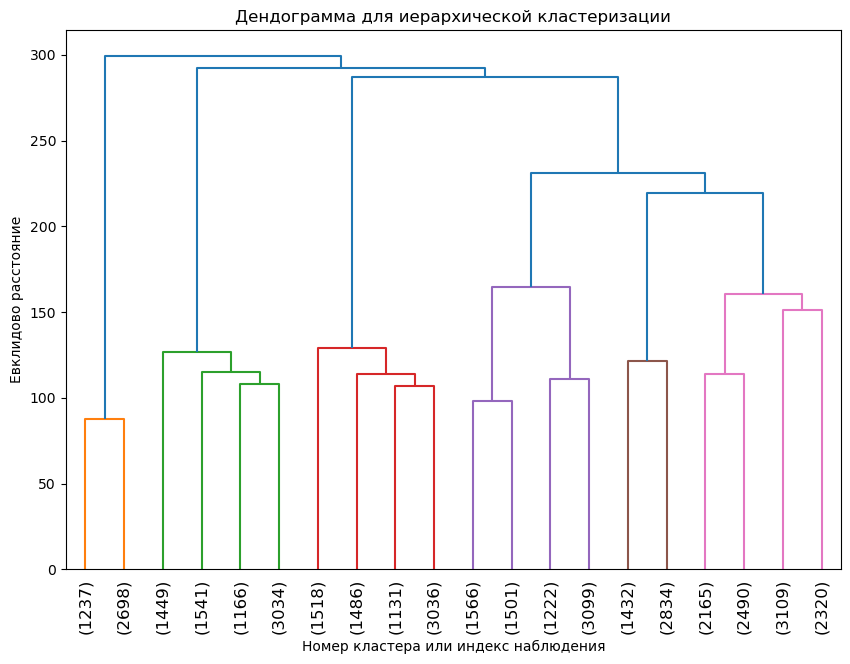

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Выполнение иерархической кластеризации с методом "Ward"
linked = linkage(scaled_data, method='ward')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12.)
plt.title('Дендограмма для иерархической кластеризации')
plt.xlabel('Номер кластера или индекс наблюдения')
plt.ylabel('Евклидово расстояние')
plt.show()


### Метод К-средних

**Шаги метода:**
1. **Определение оптимального числа кластеров:**
Будем использовать метод "локтя". При построении графика зависимости внутрикластерной суммы квадратов от количества кластеров выбирают точку, где дальнейшее уменьшение ошибки становится менее значимым.

2. **Применение алгоритма k-средних:**
С помощью библиотеки sklearn.cluster.KMeans выполним кластеризацию, задав оптимальное количество кластеров.

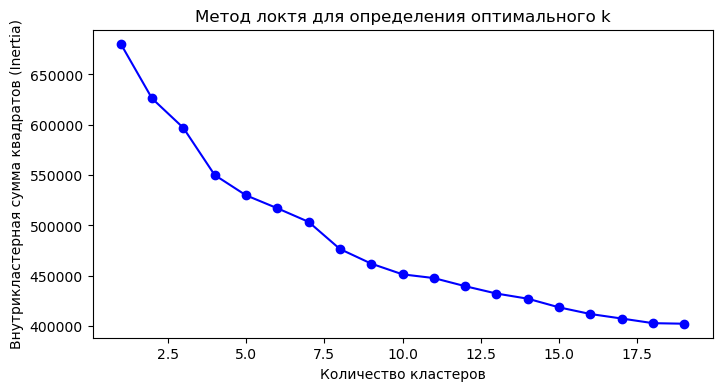

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Поиск оптимального числа кластеров с помощью метода локтя
inertia = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерная сумма квадратов (Inertia)')
plt.title('Метод локтя для определения оптимального k')
plt.show()


In [15]:
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)


### Вывод

1. Иерархическая кластеризация с методом "Ward" позволяет построить дендрограмму, по которой можно визуально определить оптимальное число кластеров.

2. Метод k-средних с использованием метода локтя помогает количественно оценить оптимальное число кластеров и провести сегментацию.